In [1]:
import cv2 # it's a toolset that helps computers understand and interpret visual data, like images and videos.
import matplotlib.pyplot as plt #data visualizatin
import os #read the path from our file
import numpy as np  # Import the numpy module

In [2]:
#human-readable and are often used for configuration, inspection, or editing before converting the 
#data into the more efficient binary format for use in production environments.
config_file = 'C:/Users/OFFICE/Downloads/Obj detection/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt' #text format of Protocol Buffers

#.pb (binary data) files contain the actual weights and operational data of the model.
frozen_model = 'C:/Users/OFFICE/Downloads/Obj detection/frozen_inference_graph.pb'

In [3]:
#cv2.dnn_DetectionModel(frozen_model, config_file) allows you to load a pre-trained object detection neural network model
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
classLabels = []
file_name = 'C:/Users/OFFICE/Downloads/Obj detection/labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels= fpt.read().rstrip('\n').split('\n')

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classLabels))

80


In [7]:
#Resizes your image to 320x320 pixels before feeding it to the model.
model.setInputSize(320,320)

#Adjusts the brightness/contrast of your image to match what the model was trained on
model.setInputScale(1.0/127.5)

#Shifts the colors of your image a bit to match the model's training data.
model.setInputMean((127.5, 127,5 ,127.5))

#Changes the order of color channels in your image
model.setInputSwapRB(True)

< cv2.dnn.Model 000001BFFE616BF0>

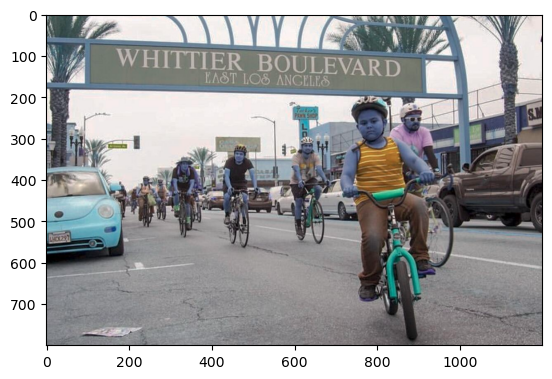

In [8]:
# Specify the absolute file path
image_path = os.path.abspath('C:/Users/OFFICE/Pictures/New folder/Test.jpeg')

# Check if the file exists
if os.path.isfile(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if img is not None:
    #`uint8` is an unsigned 8-bit integer type that can represent values ranging from 0 to 255.        img = img.astype(np.uint8)

        # Display the image using plt.imshow
        plt.imshow(img)
        plt.show()
    else:
        print("Failed to load the image.")
else:
    print(f"Image file '{image_path}' does not exist.")


In [9]:

#the 'model.detect' function analyzes the image (img) and identifies objects in it
ClassIndex,confidence,bbox = model.detect(img, confThreshold = 0.5) #confThreshold = 0.5 means only detections with a confidence of 50%

#ClassIndex: The types (or categories) of detected objects.
#confidence: How sure the model is about each detection.
#bbox: The box coordinates where each object is located in the image.

In [10]:
print(ClassIndex)

[3 1 2 3 2 2 1 1 2 1 3 2 3 2 2 2 3 2 2]


In [11]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN  #Chooses a specific font style
for ClassInd, conf,boxes in zip(ClassIndex.flatten(), confidence.flatten(),bbox):
    cv2.rectangle(img, boxes,(255,0,0),2)
    #Draws a blue rectangle ((255,0,0)) around the object. The 2 specifies the thickness of the rectangle's border.
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0], boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)
   #Writes the object's name (from classLabels) on the image#

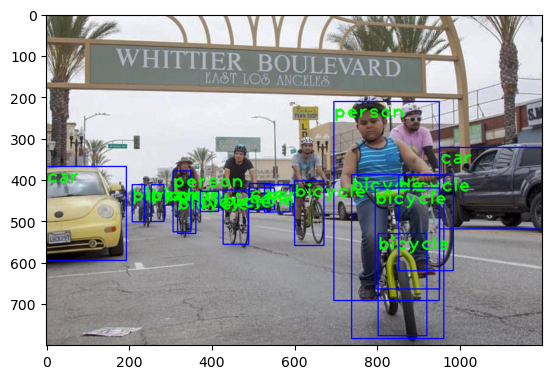

In [12]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
# Initialize video capture from the specified file path
cap = cv2.VideoCapture('C:/Users/OFFICE/Pictures/New folder/pexels-george-morina-5266805 (2160p).mp4')

# Check if the video file was opened successfully, if not, try to open the default camera (webcam)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)

# If still not opened (neither video file nor webcam), raise an error
if not cap.isOpened():
    raise IOError(" can't open the Video")

# Define font size and style for labeling detected objects
font_scale = 6
font = cv2.FONT_HERSHEY_PLAIN

# Loop to process each frame of the video
while True:
    # Read a frame from the video/camera source
    ret, frame = cap.read()

    # If there's an issue reading a frame or the video ends, exit the loop
    if not ret:
        break

    # Calculate the new height of the frame while maintaining its aspect ratio
    desired_width = 2160
    aspect_ratio = frame.shape[1] / frame.shape[0]
    desired_height = int(desired_width / aspect_ratio)

    # Resize the frame to the desired width and calculated height
    frame = cv2.resize(frame, (desired_width, desired_height))

    # Detect objects in the frame using the model
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    # If objects are detected
    if len(ClassIndex) != 0:
        # Iterate over each detected object
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            # Only process valid object categories (ones with an index up to 80 in this case)
            if ClassInd <= 80:
                # Draw a blue rectangle around the detected object
                cv2.rectangle(frame, boxes, (255,0,0), 2)
                # Label the detected object with its name
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0], boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)

    # Display the frame with detected objects (if any)
    cv2.imshow('Object Detection', frame)

    # Check if 'q' key is pressed to exit the video display loop
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

# Release the video/camera source after processing all frames
cap.release()

# Close any OpenCV windows
cv2.destroyAllWindows()
